# 🐼 Colombian National Test `Saber 11` 🧾

### Import Libraries

In [1]:
#==================================================================================
#Import Libraries
#==================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm, beta, lognorm, gamma
from scipy.stats import kstest

#from scipy.stats import linregress
#from scipy.optimize import curve_fit
#from scipy.stats import pearsonr, f_oneway

#from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score, accuracy_score, classification_report, roc_curve, roc_auc_score, auc
#from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import average_precision_score

#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

# Imports several metrics for evaluating regression and classification models.
#from sklearn.metrics import precision_recall_fscore_support as score

# Used for data preprocessing and transformation
#from sklearn.preprocessing import StandardScaler, PolynomialFeatures, label_binarize, LabelEncoder

# A Pipeline is a sequence of steps for processing and transforming data
#from sklearn.pipeline import Pipeline

# A RandomTreeDecision
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_absolute_error

### Read Data

In [2]:
#==================================================================================
#Read Data
#==================================================================================

Saber11 = pd.read_csv('SABER11_2020.csv', index_col=0, sep=';', encoding='latin-1')

Saber11_df = pd.DataFrame(Saber11)

Saber11_df

,ESTU_NACIONALIDAD,ESTU_GENERO,PERIODO,ESTU_TIENEETNIA,ESTU_COD_RESIDE_DEPTO,ESTU_COD_RESIDE_MCPIO,FAMI_ESTRATOVIVIENDA,FAMI_PERSONASHOGAR,FAMI_CUARTOSHOGAR,FAMI_EDUCACIONPADRE,...,DESEMP_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PERCENTIL_SOCIALES_CIUDADANAS,DESEMP_SOCIALES_CIUDADANAS,PUNT_INGLES,PERCENTIL_INGLES,DESEMP_INGLES,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_GENERACION-E
ESTU_TIPODOCUMENTO,,,,,,,,,,,,,,,,,,,,,
NaN,SUIZA,F,20204,No,25.0,25126.0,Estrato 2,5 a 6,Dos,Técnica o tecnológica completa,...,2,33,11,1,55.0,81,A1,244,49,NO
NaN,VENEZUELA,M,20204,No,25.0,25126.0,Estrato 3,3 a 4,Uno,Secundaria (Bachillerato) completa,...,2,49,55,2,33.0,6,A-,238,44,NO
NaN,VENEZUELA,F,20204,No,25.0,25126.0,Estrato 1,5 a 6,Uno,Primaria incompleta,...,3,68,95,3,59.0,87,A2,325,94,GENERACION E - GRATUIDAD
NaN,VENEZUELA,M,20204,No,25.0,25126.0,Sin Estrato,5 a 6,Dos,Secundaria (Bachillerato) incompleta,...,2,43,38,2,47.0,58,A-,238,45,NO
NaN,COLOMBIA,F,20204,No,25.0,25126.0,Estrato 5,5 a 6,Tres,Secundaria (Bachillerato) completa,...,2,32,7,1,43.0,40,A-,202,19,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,COLOMBIA,M,20204,No,11.0,11001.0,Estrato 2,5 a 6,Tres,Técnica o tecnológica completa,...,3,51,59,2,45.0,52,A-,282,75,NO
NaN,COLOMBIA,M,20204,No,11.0,11001.0,Estrato 2,3 a 4,Dos,Primaria incompleta,...,1,53,66,2,54.0,79,A1,257,59,NO
NaN,COLOMBIA,F,20204,No,11.0,11001.0,Estrato 2,5 a 6,Cuatro,Primaria incompleta,...,3,65,91,3,67.0,93,A2,330,95,NO


## View about Dataset

In [3]:
Saber11_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 504872 entries, nan to nan
Data columns (total 60 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ESTU_NACIONALIDAD              504872 non-null  object 
 1   ESTU_GENERO                    504864 non-null  object 
 2   PERIODO                        504872 non-null  int64  
 3   ESTU_TIENEETNIA                501879 non-null  object 
 4   ESTU_COD_RESIDE_DEPTO          504870 non-null  float64
 5   ESTU_COD_RESIDE_MCPIO          504870 non-null  float64
 6   FAMI_ESTRATOVIVIENDA           487920 non-null  object 
 7   FAMI_PERSONASHOGAR             489699 non-null  object 
 8   FAMI_CUARTOSHOGAR              489033 non-null  object 
 9   FAMI_EDUCACIONPADRE            491882 non-null  object 
 10  FAMI_EDUCACIONMADRE            491386 non-null  object 
 11  FAMI_TRABAJOLABORPADRE         485181 non-null  object 
 12  FAMI_TRABAJOLABORMADRE         48727

In [4]:
print('Total instances: ', Saber11_df.shape[0]*Saber11_df.shape[1])

Total instances:  30292320


In [5]:
Saber11_df.columns # Show all dataset's columns

Index(['ESTU_NACIONALIDAD', 'ESTU_GENERO', 'PERIODO', 'ESTU_TIENEETNIA',
       'ESTU_COD_RESIDE_DEPTO', 'ESTU_COD_RESIDE_MCPIO',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 'FAMI_CUARTOSHOGAR',
       'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'FAMI_TRABAJOLABORPADRE',
       'FAMI_TRABAJOLABORMADRE', 'FAMI_TIENEINTERNET', 'FAMI_TIENESERVICIOTV',
       'FAMI_TIENECOMPUTADOR', 'FAMI_TIENELAVADORA',
       'FAMI_TIENEHORNOMICROOGAS', 'FAMI_TIENEAUTOMOVIL',
       'FAMI_TIENEMOTOCICLETA', 'FAMI_TIENECONSOLAVIDEOJUEGOS',
       'FAMI_NUMLIBROS', 'FAMI_COMELECHEDERIVADOS',
       'FAMI_COMECARNEPESCADOHUEVO', 'FAMI_COMECEREALFRUTOSLEGUMBRE',
       'FAMI_SITUACIONECONOMICA', 'ESTU_DEDICACIONLECTURADIARIA',
       'ESTU_DEDICACIONINTERNET', 'ESTU_HORASSEMANATRABAJA',
       'ESTU_TIPOREMUNERACION', 'COLE_COD_DEPTO_UBICACION',
       'COLE_COD_MCPIO_UBICACION', 'COLE_GENERO', 'COLE_NATURALEZA',
       'COLE_CALENDARIO', 'COLE_BILINGUE', 'COLE_CARACTER',
       'COLE_SEDE_PRINCIP

In [6]:
Subject_Results = ['ESTU_COD_RESIDE_DEPTO', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']
Subject_Results_df = Saber11_df[Subject_Results]    # Select only subject's score

Subject_Results_df

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
ESTU_TIPODOCUMENTO,,,,,,,
NaN,25.0,54,65,41,33,55.0,244
NaN,25.0,57,43,46,49,33.0,238
NaN,25.0,59,72,63,68,59.0,325
NaN,25.0,47,55,46,43,47.0,238
NaN,25.0,37,48,44,32,43.0,202
...,...,...,...,...,...,...,...
NaN,11.0,60,58,60,51,45.0,282
NaN,11.0,57,55,40,53,54.0,257
NaN,11.0,78,59,62,65,67.0,330


## View about Global Score distribution

In [7]:
Saber11_df['PUNT_GLOBAL']

ESTU_TIPODOCUMENTO
NaN    244
NaN    238
NaN    325
NaN    238
NaN    202
      ... 
NaN    282
NaN    257
NaN    330
NaN    290
NaN    261
Name: PUNT_GLOBAL, Length: 504872, dtype: int64

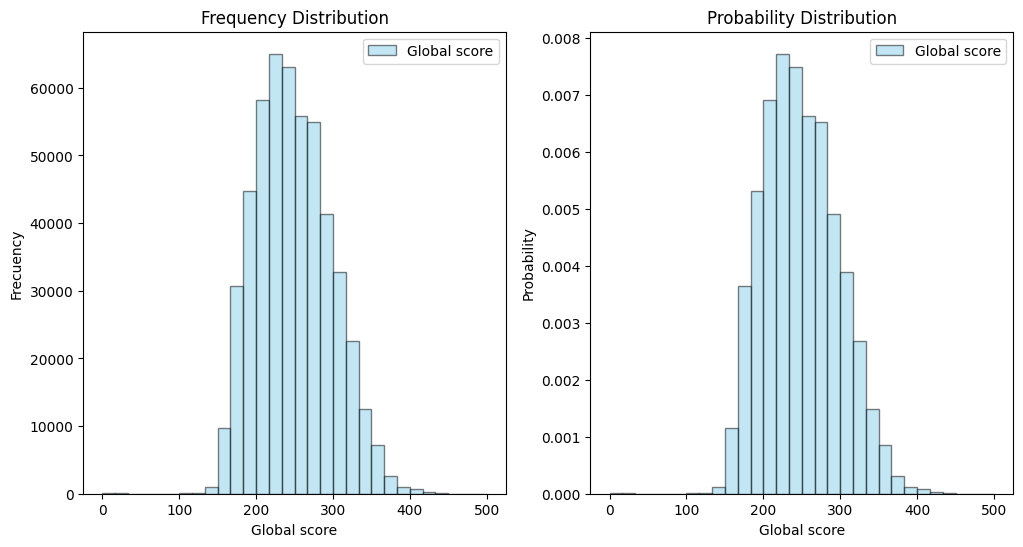

In [8]:
plt.figure(figsize=(12, 6))

ax_Freq_Dist = plt.subplot(121)
plt.hist(Saber11_df['PUNT_GLOBAL'], bins=30, alpha=0.5, label="Global score", color="skyblue", edgecolor="black")
plt.xlabel('Global score')
plt.ylabel('Frecuency')
plt.legend()
plt.title("Frequency Distribution")


ax_Prob_Dist = plt.subplot(122)
plt.hist(Saber11_df['PUNT_GLOBAL'], bins=30, density=True, alpha=0.5, label="Global score", color="skyblue", edgecolor="black")
plt.xlabel('Global score')
plt.ylabel('Probability')
plt.legend()
plt.title("Probability Distribution")

plt.show()

## General score description in Colombia

In [9]:
Subject_Results_df.describe()

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,504870.000000,504872.000000,504872.000000,504872.000000,504872.000000,504538.000000,504872.000000
mean,36.099671,52.156784,51.019754,48.197373,48.233939,46.883507,248.347102
std,613.810991,10.158427,11.647657,10.499610,11.970584,11.313128,48.692523
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,45.000000,43.000000,40.000000,39.000000,39.000000,211.000000
50%,20.000000,52.000000,51.000000,48.000000,47.000000,45.000000,245.000000
75%,54.000000,59.000000,59.000000,56.000000,57.000000,52.000000,282.000000
max,99999.000000,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000


## Focus on Quindío

In [10]:
Quindio_Subject_Results_df = Subject_Results_df.loc[(Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == '63') | (Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == 63)]  # Quindío Code = 63
print(Quindio_Subject_Results_df)
print(Quindio_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_DEPTO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                                  63.0                    41   
NaN                                  63.0                    47   
NaN                                  63.0                    50   
NaN                                  63.0                    61   
NaN                                  63.0                    50   
...                                   ...                   ...   
NaN                                  63.0                    54   
NaN                                  63.0                    66   
NaN                                  63.0                    60   
NaN                                  63.0                    58   
NaN                                  63.0                    64   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [11]:
Quindio_Subject_Results_df.describe()   #Description about scores on Quindío

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,5810.0,5810.000000,5810.000000,5810.000000,5810.000000,5810.000000,5810.000000
mean,63.0,53.389673,51.971773,49.119621,49.425818,48.020482,253.746127
std,0.0,10.078430,11.790968,10.787960,12.144625,11.206804,49.102446
min,63.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.0,46.000000,44.000000,41.000000,40.000000,40.000000,217.000000
50%,63.0,54.000000,52.000000,49.000000,49.000000,46.000000,251.000000
75%,63.0,61.000000,60.000000,57.000000,59.000000,54.000000,287.000000
max,63.0,100.000000,100.000000,100.000000,100.000000,100.000000,462.000000


## Focus on Antioquia

In [12]:
Antioquia_Subject_Results_df = Subject_Results_df.loc[(Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == '5') | (Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == 5)]  # Antioquia Code = 5
print(Antioquia_Subject_Results_df)
print(Antioquia_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_DEPTO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                                   5.0                    66   
NaN                                   5.0                    50   
NaN                                   5.0                    57   
NaN                                   5.0                    44   
NaN                                   5.0                    54   
...                                   ...                   ...   
NaN                                   5.0                    57   
NaN                                   5.0                    43   
NaN                                   5.0                    40   
NaN                                   5.0                    57   
NaN                                   5.0                    43   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [13]:
Antioquia_Subject_Results_df.describe()   #Description about scores on Antioquia

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,70478.0,70478.000000,70478.000000,70478.000000,70478.000000,70474.000000,70478.000000
mean,5.0,51.852521,49.621825,46.621258,47.838758,46.261543,243.870272
std,0.0,10.338164,11.805077,10.445108,12.083966,11.552551,48.935078
min,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.0,44.000000,41.000000,39.000000,38.000000,38.000000,206.000000
50%,5.0,52.000000,50.000000,46.000000,47.000000,44.000000,240.000000
75%,5.0,59.000000,58.000000,54.000000,57.000000,52.000000,278.000000
max,5.0,100.000000,100.000000,100.000000,100.000000,100.000000,471.000000


## Focus on Boyacá

In [14]:
Boyaca_Subject_Results_df = Subject_Results_df.loc[(Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == '15') | (Subject_Results_df['ESTU_COD_RESIDE_DEPTO'] == 15)]  # Boyacá Code = 15
print(Boyaca_Subject_Results_df)
print(Boyaca_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_DEPTO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                                  15.0                    46   
NaN                                  15.0                    37   
NaN                                  15.0                    47   
NaN                                  15.0                    59   
NaN                                  15.0                    53   
...                                   ...                   ...   
NaN                                  15.0                    47   
NaN                                  15.0                    70   
NaN                                  15.0                    57   
NaN                                  15.0                    39   
NaN                                  15.0                    53   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [15]:
Boyaca_Subject_Results_df.describe()   #Description about scores on Boyacá

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,15258.0,15258.000000,15258.000000,15258.000000,15258.000000,15258.000000,15258.000000
mean,15.0,53.834316,54.336872,51.032835,50.846048,47.961922,260.812230
std,0.0,9.668379,11.026440,9.974170,11.640947,10.585392,46.331506
min,15.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.0,47.000000,47.000000,44.000000,42.000000,41.000000,226.000000
50%,15.0,54.000000,55.000000,51.000000,51.000000,47.000000,260.000000
75%,15.0,61.000000,62.000000,58.000000,59.000000,53.000000,293.000000
max,15.0,100.000000,100.000000,100.000000,100.000000,100.000000,468.000000


In [16]:
Saber11_df['ESTU_COD_RESIDE_MCPIO'].unique()

array([25126., 25785.,  5615., ..., 68895., 25878.,  5031.])

# Average score of Quindío by municipality

## Armenia

In [17]:
Mun = ['ESTU_COD_RESIDE_MCPIO', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']
Quindio_Mun_Subject_df = Saber11_df[Mun]
Quindio_Armenia_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63001') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63001)]  # Select Armenia Code = 63001
print(Quindio_Armenia_Subject_Results_df)
print(Quindio_Armenia_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63001.0                    41   
NaN                               63001.0                    47   
NaN                               63001.0                    50   
NaN                               63001.0                    61   
NaN                               63001.0                    54   
...                                   ...                   ...   
NaN                               63001.0                    49   
NaN                               63001.0                    74   
NaN                               63001.0                    61   
NaN                               63001.0                    60   
NaN                               63001.0                    64   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [18]:
Quindio_Armenia_Subject_Results_df.describe()   # Score about Armenia

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,3049.0,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000,3049.000000
mean,63001.0,55.100689,53.960315,51.142342,51.531978,50.105280,263.576910
std,0.0,10.010298,11.982711,11.220327,12.500304,11.965573,50.481254
min,63001.0,27.000000,0.000000,25.000000,21.000000,0.000000,150.000000
25%,63001.0,48.000000,45.000000,43.000000,42.000000,42.000000,225.000000
50%,63001.0,55.000000,54.000000,51.000000,52.000000,48.000000,263.000000
75%,63001.0,62.000000,62.000000,59.000000,61.000000,56.000000,298.000000
max,63001.0,100.000000,100.000000,100.000000,100.000000,100.000000,462.000000


## Buenavista

In [19]:
Quindio_Buenavista_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63111') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63111)]  # Select Armenia Code = 63001
print(Quindio_Buenavista_Subject_Results_df)
print(Quindio_Buenavista_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63111.0                    52   
NaN                               63111.0                    46   
NaN                               63111.0                    34   
NaN                               63111.0                    43   
NaN                               63111.0                    56   
NaN                               63111.0                    63   
NaN                               63111.0                    40   
NaN                               63111.0                    52   
NaN                               63111.0                    52   
NaN                               63111.0                    51   
NaN                               63111.0                    52   
NaN                               63111.0                    58   
NaN                               63111.0                    4

In [20]:
Quindio_Buenavista_Subject_Results_df.describe()   # Score about Buenavista

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,26.0,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,63111.0,50.423077,50.769231,45.153846,49.153846,44.153846,242.615385
std,0.0,9.170270,10.351068,10.975217,10.030722,7.587845,44.017339
min,63111.0,34.000000,29.000000,29.000000,33.000000,30.000000,169.000000
25%,63111.0,43.250000,42.250000,34.500000,42.000000,39.250000,210.750000
50%,63111.0,51.500000,51.000000,44.500000,49.500000,44.500000,238.500000
75%,63111.0,56.000000,57.000000,53.000000,57.750000,48.000000,280.750000
max,63111.0,67.000000,69.000000,64.000000,64.000000,60.000000,328.000000


## Calarcá

In [21]:
Quindio_Calarca_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63130') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63130)]  # Select Calarca Code = 63130
print(Quindio_Calarca_Subject_Results_df)
print(Quindio_Calarca_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63130.0                    62   
NaN                               63130.0                    57   
NaN                               63130.0                    57   
NaN                               63130.0                    53   
NaN                               63130.0                    51   
...                                   ...                   ...   
NaN                               63130.0                    72   
NaN                               63130.0                    42   
NaN                               63130.0                    56   
NaN                               63130.0                    68   
NaN                               63130.0                    58   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [22]:
Quindio_Calarca_Subject_Results_df.describe()   # Score about Calarca

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,63130.0,53.206944,52.247222,48.466667,49.041667,46.934722,252.236111
std,0.0,9.693937,11.387229,10.255783,11.434201,10.026247,46.307190
min,63130.0,28.000000,21.000000,0.000000,21.000000,0.000000,103.000000
25%,63130.0,46.000000,44.000000,41.000000,40.000000,40.000000,217.000000
50%,63130.0,54.000000,52.500000,48.000000,49.000000,46.000000,250.500000
75%,63130.0,60.000000,60.000000,56.000000,57.000000,52.000000,285.000000
max,63130.0,77.000000,100.000000,100.000000,100.000000,83.000000,404.000000


## Montenegro

## Circasia

In [23]:
Quindio_Cicasia_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63190') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63190)]  # Select Calarca Code = 63190
print(Quindio_Cicasia_Subject_Results_df)
print(Quindio_Cicasia_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63190.0                    54   
NaN                               63190.0                    55   
NaN                               63190.0                    41   
NaN                               63190.0                    50   
NaN                               63190.0                    71   
...                                   ...                   ...   
NaN                               63190.0                    53   
NaN                               63190.0                    53   
NaN                               63190.0                    51   
NaN                               63190.0                    50   
NaN                               63190.0                    30   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [24]:
Quindio_Cicasia_Subject_Results_df.describe()   # Score about Calarca

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,63190.0,52.067669,50.007519,48.041353,48.469925,46.939850,247.210526
std,0.0,9.816579,11.108383,9.984241,11.397163,9.405145,45.079477
min,63190.0,28.000000,22.000000,27.000000,22.000000,30.000000,156.000000
25%,63190.0,45.000000,42.000000,40.000000,39.000000,41.000000,211.250000
50%,63190.0,53.000000,50.000000,48.000000,49.000000,46.000000,246.000000
75%,63190.0,59.000000,57.000000,55.000000,57.000000,52.000000,279.000000
max,63190.0,74.000000,77.000000,74.000000,74.000000,77.000000,362.000000


## Córdoba

In [25]:
Quindio_Cordoba_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63212') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63212)]  # Select Córdoba Code = 63212
print(Quindio_Cordoba_Subject_Results_df)
print(Quindio_Cordoba_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63212.0                    35   
NaN                               63212.0                    41   
NaN                               63212.0                    36   
NaN                               63212.0                    50   
NaN                               63212.0                    57   
...                                   ...                   ...   
NaN                               63212.0                    60   
NaN                               63212.0                    46   
NaN                               63212.0                    45   
NaN                               63212.0                    48   
NaN                               63212.0                    45   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [26]:
Quindio_Cordoba_Subject_Results_df.describe()   # Score about Córdoba

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,75.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,63212.0,47.200000,45.720000,41.400000,42.213333,43.600000,220.453333
std,0.0,8.277289,8.406175,8.432562,8.104542,6.898884,33.249789
min,63212.0,26.000000,28.000000,25.000000,27.000000,29.000000,147.000000
25%,63212.0,40.000000,39.000000,35.000000,37.000000,39.000000,192.000000
50%,63212.0,48.000000,45.000000,40.000000,42.000000,43.000000,222.000000
75%,63212.0,54.000000,51.500000,49.500000,49.000000,48.000000,246.000000
max,63212.0,63.000000,66.000000,62.000000,58.000000,68.000000,298.000000


## Filandia

In [27]:
Quindio_Filandia_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63272') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63272)]  # Select Filandia Code = 63272
print(Quindio_Filandia_Subject_Results_df)
print(Quindio_Filandia_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63272.0                    57   
NaN                               63272.0                    49   
NaN                               63272.0                    51   
NaN                               63272.0                    46   
NaN                               63272.0                    41   
...                                   ...                   ...   
NaN                               63272.0                    62   
NaN                               63272.0                    55   
NaN                               63272.0                    32   
NaN                               63272.0                    58   
NaN                               63272.0                    53   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [28]:
Quindio_Filandia_Subject_Results_df.describe()   # Score about Filandia

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,166.0,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,63272.0,50.921687,50.969880,48.638554,47.608434,45.873494,246.271084
std,0.0,10.167084,11.760965,10.240831,11.187533,9.968539,46.244987
min,63272.0,28.000000,26.000000,27.000000,20.000000,0.000000,143.000000
25%,63272.0,43.000000,44.000000,41.000000,40.000000,39.000000,211.000000
50%,63272.0,51.000000,52.000000,48.500000,48.000000,44.000000,246.000000
75%,63272.0,58.750000,58.000000,56.000000,55.000000,51.000000,280.000000
max,63272.0,76.000000,100.000000,76.000000,73.000000,80.000000,394.000000


## Génova

In [29]:
Quindio_Genova_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63302') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63302)]  # Select Génova Code = 63302
print(Quindio_Genova_Subject_Results_df)
print(Quindio_Genova_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63302.0                    56   
NaN                               63302.0                    48   
NaN                               63302.0                    40   
NaN                               63302.0                    64   
NaN                               63302.0                    32   
...                                   ...                   ...   
NaN                               63302.0                    48   
NaN                               63302.0                    58   
NaN                               63302.0                    49   
NaN                               63302.0                    55   
NaN                               63302.0                    42   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [30]:
Quindio_Genova_Subject_Results_df.describe()   # Score about Filandia

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,75.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,63302.0,49.266667,45.840000,45.866667,45.400000,42.266667,231.346667
std,0.0,9.601989,10.988987,9.604804,11.324453,9.239067,44.685233
min,63302.0,29.000000,23.000000,26.000000,22.000000,29.000000,162.000000
25%,63302.0,43.000000,39.500000,38.500000,36.500000,36.000000,198.000000
50%,63302.0,48.000000,45.000000,45.000000,44.000000,40.000000,223.000000
75%,63302.0,56.000000,52.000000,52.000000,54.500000,46.500000,267.500000
max,63302.0,72.000000,100.000000,76.000000,71.000000,84.000000,400.000000


## La Tebaida

In [31]:
Quindio_Tebaida_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63401') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63401)]  # Select Tebaida Code = 63401
print(Quindio_Tebaida_Subject_Results_df)
print(Quindio_Tebaida_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63401.0                    50   
NaN                               63401.0                    40   
NaN                               63401.0                    50   
NaN                               63401.0                    51   
NaN                               63401.0                    36   
...                                   ...                   ...   
NaN                               63401.0                    50   
NaN                               63401.0                    42   
NaN                               63401.0                    39   
NaN                               63401.0                    57   
NaN                               63401.0                    66   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [32]:
Quindio_Tebaida_Subject_Results_df.describe()   # Score about Tebaida

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,455.0,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,63401.0,49.868132,47.279121,44.380220,44.338462,43.628571,231.230769
std,0.0,9.588458,9.844110,8.729314,10.741032,8.569260,40.265385
min,63401.0,28.000000,0.000000,0.000000,22.000000,28.000000,115.000000
25%,63401.0,43.000000,41.000000,38.000000,36.000000,38.000000,199.000000
50%,63401.0,50.000000,47.000000,44.000000,43.000000,43.000000,228.000000
75%,63401.0,56.500000,54.000000,50.000000,52.000000,49.000000,259.000000
max,63401.0,77.000000,76.000000,67.000000,71.000000,76.000000,351.000000


In [33]:
Quindio_Montenegro_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63470') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63470)]  # Select Montenegro Code = 63470
print(Quindio_Montenegro_Subject_Results_df)
print(Quindio_Montenegro_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63470.0                    60   
NaN                               63470.0                    52   
NaN                               63470.0                    64   
NaN                               63470.0                    59   
NaN                               63470.0                    49   
...                                   ...                   ...   
NaN                               63470.0                    39   
NaN                               63470.0                    54   
NaN                               63470.0                    55   
NaN                               63470.0                    38   
NaN                               63470.0                    60   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [34]:
Quindio_Montenegro_Subject_Results_df.describe()   # Score about Montenegro

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,63470.0,50.732360,49.024331,45.630170,45.712895,45.133820,237.868613
std,0.0,9.711266,11.208420,9.456677,11.078228,10.463367,44.825214
min,63470.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63470.0,44.000000,41.500000,39.000000,37.000000,38.000000,206.000000
50%,63470.0,52.000000,50.000000,46.000000,45.000000,44.000000,235.000000
75%,63470.0,58.000000,57.000000,52.000000,54.000000,51.000000,270.000000
max,63470.0,76.000000,80.000000,72.000000,74.000000,79.000000,358.000000


## Pijao

In [35]:
Quindio_Pijao_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63548') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63548)]  # Select Pijao Code = 63548
print(Quindio_Pijao_Subject_Results_df)
print(Quindio_Pijao_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63548.0                    64   
NaN                               63548.0                    49   
NaN                               63548.0                    68   
NaN                               63548.0                    60   
NaN                               63548.0                    64   
...                                   ...                   ...   
NaN                               63548.0                    64   
NaN                               63548.0                    52   
NaN                               63548.0                    60   
NaN                               63548.0                    64   
NaN                               63548.0                    54   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [36]:
Quindio_Pijao_Subject_Results_df.describe()   # Score about Pijao

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,98.0,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,63548.0,52.500000,50.051020,48.510204,48.214286,46.836735,247.938776
std,0.0,9.377809,11.661349,9.378903,10.522680,9.676940,43.658897
min,63548.0,31.000000,19.000000,25.000000,28.000000,30.000000,149.000000
25%,63548.0,48.000000,45.000000,43.000000,40.000000,40.250000,225.250000
50%,63548.0,52.000000,51.500000,48.000000,47.000000,46.000000,244.500000
75%,63548.0,58.750000,57.000000,54.000000,56.000000,51.500000,274.500000
max,63548.0,76.000000,100.000000,70.000000,71.000000,74.000000,372.000000


## Quimbaya

In [37]:
Quindio_Quimbaya_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63594') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63594)]  # Select Quimbaya Code = 63594
print(Quindio_Quimbaya_Subject_Results_df)
print(Quindio_Quimbaya_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63594.0                    43   
NaN                               63594.0                    49   
NaN                               63594.0                    51   
NaN                               63594.0                    37   
NaN                               63594.0                    57   
...                                   ...                   ...   
NaN                               63594.0                    49   
NaN                               63594.0                    67   
NaN                               63594.0                    45   
NaN                               63594.0                    55   
NaN                               63594.0                    69   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [38]:
Quindio_Quimbaya_Subject_Results_df.describe()   # Score about Quimbaya

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,383.0,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,63594.0,51.825065,49.916449,47.733681,47.678851,46.712794,245.456919
std,0.0,9.921324,11.236082,9.684396,11.584145,10.455892,45.575352
min,63594.0,27.000000,21.000000,28.000000,22.000000,28.000000,149.000000
25%,63594.0,44.000000,42.000000,41.000000,39.000000,39.000000,210.500000
50%,63594.0,52.000000,50.000000,47.000000,47.000000,45.000000,241.000000
75%,63594.0,59.000000,58.000000,54.000000,55.000000,52.000000,274.500000
max,63594.0,100.000000,81.000000,77.000000,100.000000,81.000000,391.000000


## Salento

In [39]:
Quindio_Salento_Subject_Results_df = Quindio_Mun_Subject_df.loc[(Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == '63690') | (Quindio_Mun_Subject_df['ESTU_COD_RESIDE_MCPIO'] == 63690)]  # Select Salento Code = 63690
print(Quindio_Salento_Subject_Results_df)
print(Quindio_Salento_Subject_Results_df.shape)

                    ESTU_COD_RESIDE_MCPIO  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                
NaN                               63690.0                    50   
NaN                               63690.0                    55   
NaN                               63690.0                    68   
NaN                               63690.0                    47   
NaN                               63690.0                    40   
...                                   ...                   ...   
NaN                               63690.0                    56   
NaN                               63690.0                    68   
NaN                               63690.0                    45   
NaN                               63690.0                    51   
NaN                               63690.0                    63   

                    PUNT_MATEMATICAS  PUNT_C_NATURALES  \
ESTU_TIPODOCUMENTO                                       
NaN         

In [40]:
Quindio_Salento_Subject_Results_df.describe()   # Score about Salento

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,63690.0,52.313953,48.593023,46.523256,48.139535,44.930233,242.965116
std,0.0,10.552125,11.779721,8.995066,11.595296,9.315125,45.264828
min,63690.0,25.000000,22.000000,28.000000,20.000000,29.000000,165.000000
25%,63690.0,45.000000,41.000000,41.000000,41.000000,38.000000,203.500000
50%,63690.0,52.500000,48.500000,46.000000,47.500000,44.000000,241.000000
75%,63690.0,59.000000,57.000000,53.000000,57.000000,50.750000,276.250000
max,63690.0,75.000000,75.000000,68.000000,73.000000,73.000000,341.000000


# Average Score by Gender

## Female

In [41]:
Gen = ['ESTU_GENERO', 'ESTU_NACIONALIDAD', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']
Gender_Subject_df = Saber11_df[Gen]
Gender_Subject_df = Gender_Subject_df.loc[(Gender_Subject_df['ESTU_NACIONALIDAD'] == 'COLOMBIA')]
F_Gender_Subject_Results_df = Gender_Subject_df.loc[(Gender_Subject_df['ESTU_GENERO'] == 'F')]  # Select female gender = F
print(F_Gender_Subject_Results_df)
print(F_Gender_Subject_Results_df.shape)

                   ESTU_GENERO ESTU_NACIONALIDAD  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                       
NaN                          F          COLOMBIA                    37   
NaN                          F          COLOMBIA                    45   
NaN                          F          COLOMBIA                    43   
NaN                          F          COLOMBIA                    55   
NaN                          F          COLOMBIA                    55   
...                        ...               ...                   ...   
NaN                          F          COLOMBIA                    62   
NaN                          F          COLOMBIA                    40   
NaN                          F          COLOMBIA                    55   
NaN                          F          COLOMBIA                    78   
NaN                          F          COLOMBIA                    58   

                    PUNT_MATEMATICAS 

In [42]:
F_Gender_Subject_Results_df.describe()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,274735.000000,274735.000000,274735.000000,274735.000000,274541.000000,274735.000000
mean,52.060735,49.693854,47.425093,47.840268,46.417741,245.181600
std,10.149254,11.310068,10.152476,11.642077,11.036832,47.504734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,42.000000,40.000000,39.000000,39.000000,209.000000
50%,52.000000,50.000000,47.000000,47.000000,45.000000,241.000000
75%,59.000000,57.000000,54.000000,56.000000,51.000000,278.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,492.000000


## Male

In [43]:
M_Gender_Subject_Results_df = Gender_Subject_df.loc[(Gender_Subject_df['ESTU_GENERO'] == 'M')]  # Select male gender = M
print(M_Gender_Subject_Results_df)
print(M_Gender_Subject_Results_df.shape)

                   ESTU_GENERO ESTU_NACIONALIDAD  PUNT_LECTURA_CRITICA  \
ESTU_TIPODOCUMENTO                                                       
NaN                          M          COLOMBIA                    58   
NaN                          M          COLOMBIA                    49   
NaN                          M          COLOMBIA                    64   
NaN                          M          COLOMBIA                    64   
NaN                          M          COLOMBIA                    64   
...                        ...               ...                   ...   
NaN                          M          COLOMBIA                    47   
NaN                          M          COLOMBIA                    57   
NaN                          M          COLOMBIA                    60   
NaN                          M          COLOMBIA                    57   
NaN                          M          COLOMBIA                    69   

                    PUNT_MATEMATICAS 

In [44]:
M_Gender_Subject_Results_df.describe()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,226965.000000,226965.000000,226965.000000,226965.000000,226825.000000,226965.000000
mean,52.282317,52.651810,49.142885,48.722054,47.447239,252.246448
std,10.171984,11.843585,10.834702,12.347978,11.597458,49.843082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,44.000000,41.000000,39.000000,39.000000,214.000000
50%,53.000000,53.000000,49.000000,48.000000,46.000000,250.000000
75%,59.000000,61.000000,57.000000,58.000000,53.000000,287.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000


# Classification by Stratum

In [45]:
Saber11_df['FAMI_ESTRATOVIVIENDA'].unique() # Show stratum

array(['Estrato 2', 'Estrato 3', 'Estrato 1', 'Sin Estrato', 'Estrato 5',
       'Estrato 6', 'Estrato 4', nan], dtype=object)

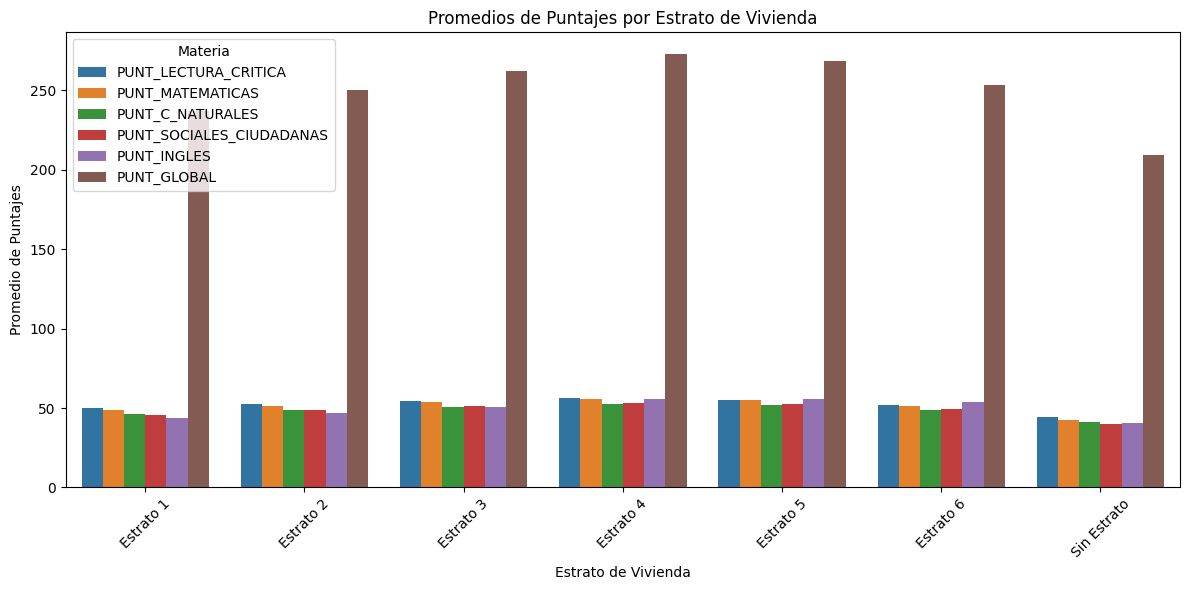

In [46]:
promedios = Saber11_df.groupby('FAMI_ESTRATOVIVIENDA')[['PUNT_LECTURA_CRITICA', 
                                                  'PUNT_MATEMATICAS', 
                                                  'PUNT_C_NATURALES', 
                                                  'PUNT_SOCIALES_CIUDADANAS', 
                                                  'PUNT_INGLES', 
                                                  'PUNT_GLOBAL']].mean().reset_index()


plt.figure(figsize=(12, 6))
promedios_melted = promedios.melt(id_vars='FAMI_ESTRATOVIVIENDA', 
                                   value_vars=['PUNT_LECTURA_CRITICA', 
                                               'PUNT_MATEMATICAS', 
                                               'PUNT_C_NATURALES', 
                                               'PUNT_SOCIALES_CIUDADANAS', 
                                               'PUNT_INGLES', 
                                               'PUNT_GLOBAL'], 
                                   var_name='Materia', 
                                   value_name='Promedio')

# Gráfica
sns.barplot(data=promedios_melted, x='FAMI_ESTRATOVIVIENDA', y='Promedio', hue='Materia')
plt.title('Promedios de Puntajes por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Promedio de Puntajes')
plt.xticks(rotation=45)
plt.legend(title='Materia')
plt.tight_layout()
plt.show()


# Performance of participants with different nationalities

In [47]:
print(Saber11_df['ESTU_NACIONALIDAD'].unique())    # Show all nationalities of participants
print('Total nationalities: ', len(Saber11_df['ESTU_NACIONALIDAD'].unique()))   # Show how many nationalities there are

['SUIZA' 'VENEZUELA' 'COLOMBIA' 'ECUADOR' 'GUATEMALA' 'PERÚ'
 'ESTADOS UNIDOS' 'MÉXICO' 'ITALIA' 'COREA DEL SUR' 'URUGUAY'
 'ESTADOS FEDERADOS DE MICRONESIA' 'BOLIVIA' 'PANAMÁ' 'CHILE'
 'REPÚBLICA DOMINICANA' 'EL SALVADOR' 'BRASIL' 'ARGENTINA' 'ESPAÑA'
 'WALLIS Y FUTUNA' 'CABO VERDE' 'VANUATU' 'VIETNAM' 'FRANCIA' 'HONDURAS'
 'CUBA' 'JAPÓN' 'ARABIA SAUDITA' 'RUSIA' 'HAITI' 'EGIPTO' 'IRÁN'
 'REINO UNIDO' 'COSTA RICA' 'CHINA' 'LITUANIA' 'CURAZAO' 'ARUBA'
 'PARAGUAY' 'NICARAGUA' 'ALEMANIA' 'CANADÁ' 'COREA DEL NORTE' 'TURQUÍA'
 'PAÍSES BAJOS - HOLANDA' 'OMÁN']
Total nationalities:  47


In [48]:
Nat = ['ESTU_NACIONALIDAD', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']
Nat_Subject_df = Saber11_df[Nat]
Ven_Nat_Subject_Results_df = Nat_Subject_df.loc[(Nat_Subject_df['ESTU_NACIONALIDAD'] == 'VENEZUELA')]  # Select Venezuela nationality
print(Ven_Nat_Subject_Results_df)
print(Ven_Nat_Subject_Results_df.shape)

                   ESTU_NACIONALIDAD  PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
ESTU_TIPODOCUMENTO                                                             
NaN                        VENEZUELA                    57                43   
NaN                        VENEZUELA                    59                72   
NaN                        VENEZUELA                    47                55   
NaN                        VENEZUELA                    43                43   
NaN                        VENEZUELA                    43                37   
...                              ...                   ...               ...   
NaN                        VENEZUELA                    63                54   
NaN                        VENEZUELA                    42                41   
NaN                        VENEZUELA                    55                47   
NaN                        VENEZUELA                    50                46   
NaN                        VENEZUELA    

In [49]:
Ven_Nat_Subject_Results_df.describe()   #Show the score for Venezuelans

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,51.117526,48.582849,47.053297,46.989067,45.965494,241.229587
std,9.775218,11.288694,10.105690,11.162530,11.765967,45.865474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,41.000000,40.000000,39.000000,39.000000,207.000000
50%,51.000000,48.000000,47.000000,46.000000,44.000000,238.000000
75%,58.000000,56.000000,54.000000,55.000000,51.000000,272.000000
max,78.000000,100.000000,100.000000,100.000000,100.000000,404.000000


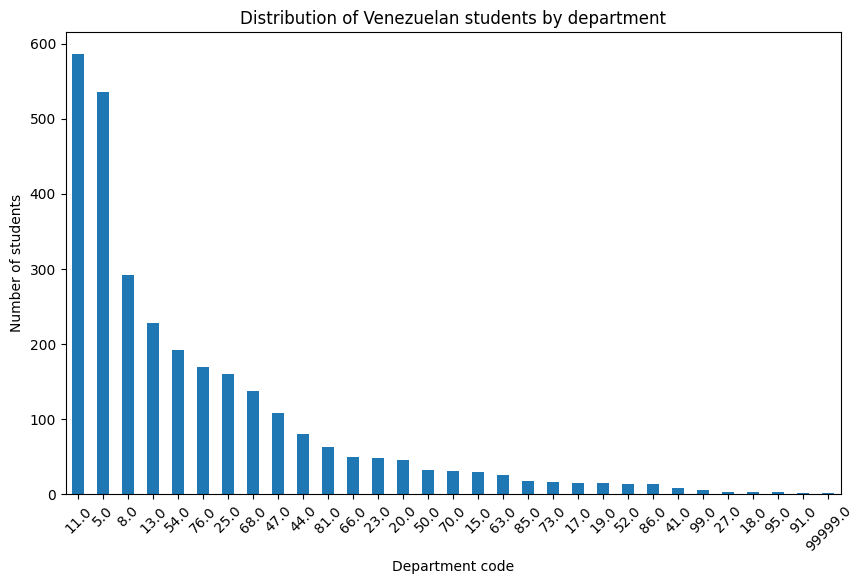

In [50]:
Ven_Dep_df = Saber11_df[['ESTU_NACIONALIDAD', 'ESTU_COD_RESIDE_DEPTO']]
Ven_Dep_Tot = Ven_Dep_df.loc[(Ven_Dep_df['ESTU_NACIONALIDAD'] == 'VENEZUELA')]

Cont_Dep_Ven = Ven_Dep_Tot['ESTU_COD_RESIDE_DEPTO'].value_counts()

plt.figure(figsize=(10, 6))
Cont_Dep_Ven.plot(kind='bar')
plt.title('Distribution of Venezuelan students by department')
plt.xlabel('Department code')
plt.ylabel('Number of students')
plt.xticks(rotation=45)  
plt.show()

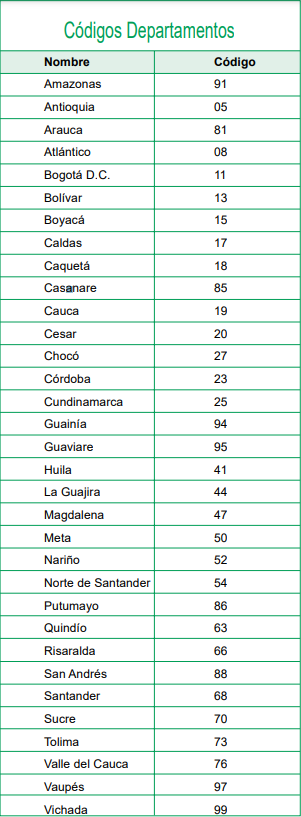

# Ethnic Groups

In [51]:
Ethnic = ['ESTU_TIENEETNIA', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']
Ethnic_Subject_df = Saber11_df[Ethnic]
Ethnic_Yes_Subject_Results_df = Ethnic_Subject_df.loc[(Ethnic_Subject_df['ESTU_TIENEETNIA'] == 'Si')]  # Select Ethnic
print(Ethnic_Yes_Subject_Results_df)
print(Ethnic_Yes_Subject_Results_df.shape)

                   ESTU_TIENEETNIA  PUNT_LECTURA_CRITICA  PUNT_MATEMATICAS  \
ESTU_TIPODOCUMENTO                                                           
NaN                             Si                    54                57   
NaN                             Si                    54                43   
NaN                             Si                    51                37   
NaN                             Si                    51                44   
NaN                             Si                    37                38   
...                            ...                   ...               ...   
NaN                             Si                    33                41   
NaN                             Si                    43                38   
NaN                             Si                    48                46   
NaN                             Si                    47                59   
NaN                             Si                    58        

In [52]:
Ethnic_Yes_Subject_Results_df.describe()

,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,31941.000000,31941.000000,31941.000000,31941.000000,31609.000000,31941.000000
mean,46.062115,44.391691,42.509752,41.757240,41.730109,217.640149
std,9.758773,10.719052,9.221779,10.501241,8.618526,42.646425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,37.000000,36.000000,34.000000,36.000000,185.000000
50%,45.000000,43.000000,41.000000,40.000000,40.000000,210.000000
75%,53.000000,51.000000,48.000000,48.000000,46.000000,243.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,445.000000


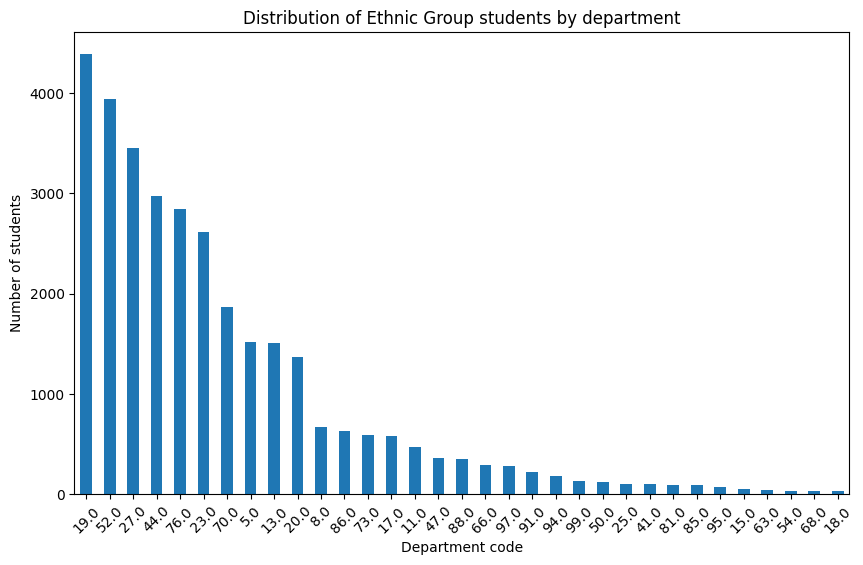

In [53]:
Etn_Dep_df = Saber11_df[['ESTU_TIENEETNIA', 'ESTU_COD_RESIDE_DEPTO']]
Etn_Dep_Tot = Etn_Dep_df.loc[(Etn_Dep_df['ESTU_TIENEETNIA'] == 'Si')]

Cont_Dep_Etn = Etn_Dep_Tot['ESTU_COD_RESIDE_DEPTO'].value_counts()

plt.figure(figsize=(10, 6))
Cont_Dep_Etn.plot(kind='bar')
plt.title('Distribution of Ethnic Group students by department')
plt.xlabel('Department code')
plt.ylabel('Number of students')
plt.xticks(rotation=45)  
plt.show()

# Hypothesis testing 📝

### $Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}}$
Where:
-  $\bar{X}$ is sample mean.
-  $\mu_0$ is the known population mean.
-  $\sigma$ is the known population standard deviation.
-  $n$ is the sample size.


In [54]:
def Z(X_bar, mu_0, sigma, n, alpha):
    Z = (X_bar - mu_0) / (sigma / np.sqrt(n))
    z_critical = norm.ppf(1 - alpha / 2)    # Critical value of Z for a two-tailed test
    if  abs(Z) > abs(z_critical):
        return('The null hypothesis (H_0) is rejected',  Z, z_critical)

    else:
        return('The alternative hypothesis (H_1) is rejected', Z,  z_critical)


In [55]:
Subject_Results_df.describe()

,ESTU_COD_RESIDE_DEPTO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,504870.000000,504872.000000,504872.000000,504872.000000,504872.000000,504538.000000,504872.000000
mean,36.099671,52.156784,51.019754,48.197373,48.233939,46.883507,248.347102
std,613.810991,10.158427,11.647657,10.499610,11.970584,11.313128,48.692523
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,45.000000,43.000000,40.000000,39.000000,39.000000,211.000000
50%,20.000000,52.000000,51.000000,48.000000,47.000000,45.000000,245.000000
75%,54.000000,59.000000,59.000000,56.000000,57.000000,52.000000,282.000000
max,99999.000000,100.000000,100.000000,100.000000,100.000000,100.000000,500.000000


In [56]:
Quindio_Montenegro_Subject_Results_df.describe()

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,63470.0,50.732360,49.024331,45.630170,45.712895,45.133820,237.868613
std,0.0,9.711266,11.208420,9.456677,11.078228,10.463367,44.825214
min,63470.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63470.0,44.000000,41.500000,39.000000,37.000000,38.000000,206.000000
50%,63470.0,52.000000,50.000000,46.000000,45.000000,44.000000,235.000000
75%,63470.0,58.000000,57.000000,52.000000,54.000000,51.000000,270.000000
max,63470.0,76.000000,80.000000,72.000000,74.000000,79.000000,358.000000


In [57]:
Quindio_Calarca_Subject_Results_df.describe()

,ESTU_COD_RESIDE_MCPIO,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
count,720.0,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,63130.0,53.206944,52.247222,48.466667,49.041667,46.934722,252.236111
std,0.0,9.693937,11.387229,10.255783,11.434201,10.026247,46.307190
min,63130.0,28.000000,21.000000,0.000000,21.000000,0.000000,103.000000
25%,63130.0,46.000000,44.000000,41.000000,40.000000,40.000000,217.000000
50%,63130.0,54.000000,52.500000,48.000000,49.000000,46.000000,250.500000
75%,63130.0,60.000000,60.000000,56.000000,57.000000,52.000000,285.000000
max,63130.0,77.000000,100.000000,100.000000,100.000000,83.000000,404.000000


Check equality of the means of the total scores for 2 groups of department Quindio:
group 1: Montenegro, group 2: Calarca

In [93]:
# General Data
mu_General_Result_mean = Subject_Results_df['PUNT_GLOBAL'].mean()
sigma_Varianza_General_Result = Subject_Results_df.describe().iloc[2, 6]

# Data for calculate hypothesis testing for Montenegro
X_Montenegro_Sample_mean = Quindio_Montenegro_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Montenegro_Sample_count = Quindio_Montenegro_Subject_Results_df['PUNT_GLOBAL'].count()

# Call  the function to calculate the hypothesis testing
alpha = 0.05 # Set alpha 

Messaje_Montenegro, Z_value_Montenegro, Z_Critical_Montenegro = Z(X_Montenegro_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Montenegro_Sample_count, alpha)

# Data for Calarcá
X_Calarca_Sample_mean =  Quindio_Calarca_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Calarca_Sample_count = Quindio_Calarca_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Calarca, Z_value_Calarca, Z_Critical_Calarca = Z(X_Calarca_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Calarca_Sample_count, alpha)

# Data for Buenavista
X_Buenavista_Sample_mean =  Quindio_Buenavista_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Buenavista_Sample_count = Quindio_Buenavista_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Buenavista, Z_value_Buenavista, Z_Critical_Buenavista = Z(X_Buenavista_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Buenavista_Sample_count, alpha)

# Data for Tebaida
X_Tebaida_Sample_mean =  Quindio_Tebaida_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Tebaida_Sample_count = Quindio_Tebaida_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Tebaida, Z_value_Tebaida, Z_Critical_Tebaida = Z(X_Tebaida_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Tebaida_Sample_count, alpha)

# Data for Córdoba
X_Cordoba_Sample_mean =  Quindio_Cordoba_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Cordoba_Sample_count = Quindio_Cordoba_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Cordoba, Z_value_Cordoba, Z_Critical_Cordoba = Z(X_Cordoba_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Cordoba_Sample_count, alpha)

# Data for Génova
X_Genova_Sample_mean =  Quindio_Genova_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Genova_Sample_count = Quindio_Genova_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Genova, Z_value_Genova, Z_Critical_Genova = Z(X_Genova_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Genova_Sample_count, alpha)

# Data for Filandia
X_Filandia_Sample_mean =  Quindio_Filandia_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Filandia_Sample_count = Quindio_Filandia_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Filandia, Z_value_Filandia, Z_Critical_Filandia = Z(X_Filandia_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Filandia_Sample_count, alpha)

# Data for Pijao
X_Pijao_Sample_mean =  Quindio_Pijao_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Pijao_Sample_count = Quindio_Pijao_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Pijao, Z_value_Pijao, Z_Critical_Pijao = Z(X_Pijao_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Pijao_Sample_count, alpha)

# Data for Quimbaya
X_Quimbaya_Sample_mean =  Quindio_Quimbaya_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Quimbaya_Sample_count = Quindio_Quimbaya_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Quimbaya, Z_value_Quimbaya, Z_Critical_Quimbaya = Z(X_Quimbaya_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Quimbaya_Sample_count, alpha)

# Data for Circasia
X_Circasia_Sample_mean =  Quindio_Cicasia_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Circasia_Sample_count = Quindio_Cicasia_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Circasia, Z_value_Circasia, Z_Critical_Circasia = Z(X_Circasia_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Circasia_Sample_count, alpha)

# Data for Armenia
X_Armenia_Sample_mean =  Quindio_Armenia_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Armenia_Sample_count = Quindio_Armenia_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Armenia, Z_value_Armenia, Z_Critical_Armenia = Z(X_Armenia_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Armenia_Sample_count, alpha)

# Data for Salento
X_Salento_Sample_mean =  Quindio_Salento_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Salento_Sample_count = Quindio_Salento_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Salento, Z_value_Salento, Z_Critical_Salento = Z(X_Salento_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Salento_Sample_count, alpha)

# Print
print('{} for Montenegro. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Montenegro, Z_value_Montenegro, Z_Critical_Montenegro)) # Print the result of the hypothesis testing
print()
print('{} for Calarcá. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Calarca, Z_value_Calarca, Z_Critical_Calarca))
print()
print('{} for Buenavista. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Buenavista, Z_value_Buenavista, Z_Critical_Buenavista))
print()
print('{} for Tebaida. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Tebaida, Z_value_Tebaida, Z_Critical_Tebaida))
print()
print('{} for Córdoba. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Cordoba, Z_value_Cordoba, Z_Critical_Cordoba))
print()
print('{} for Génova. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Genova, Z_value_Genova, Z_Critical_Genova))
print()
print('{} for Filandia. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Filandia, Z_value_Filandia, Z_Critical_Filandia))
print()
print('{} for Pijao. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Pijao, Z_value_Pijao, Z_Critical_Pijao))
print()
print('{} for Quimbaya. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Quimbaya, Z_value_Quimbaya, Z_Critical_Quimbaya))
print()
print('{} for Circasia. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Circasia, Z_value_Circasia, Z_Critical_Circasia))
print()
print('{} for Armenia. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Armenia, Z_value_Armenia, Z_Critical_Armenia))
print()
print('{} for Salento. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Salento, Z_value_Salento, Z_Critical_Salento))

The null hypothesis (H_0) is rejected for Montenegro. Z value= -4.3627 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for Calarcá. Z value= 2.1431 & Z critical = 1.9600

The alternative hypothesis (H_1) is rejected for Buenavista. Z value= -0.6002 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for Tebaida. Z value= -7.4982 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for Córdoba. Z value= -4.9611 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for Génova. Z value= -3.0236 & Z critical = 1.9600

The alternative hypothesis (H_1) is rejected for Filandia. Z value= -0.5493 & Z critical = 1.9600

The alternative hypothesis (H_1) is rejected for Pijao. Z value= -0.0830 & Z critical = 1.9600

The alternative hypothesis (H_1) is rejected for Quimbaya. Z value= -1.1616 & Z critical = 1.9600

The alternative hypothesis (H_1) is rejected for Circasia. Z value= -0.3807 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for Armenia.

In [95]:
# Data for Quindio
X_Quindio_Sample_mean =  Quindio_Subject_Results_df['PUNT_GLOBAL'].mean()
n_Quindio_Sample_count = Quindio_Subject_Results_df['PUNT_GLOBAL'].count()

Messaje_Quindio, Z_value_Quindio, Z_Critical_Quindio = Z(X_Quindio_Sample_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Quindio_Sample_count, alpha)

# Print
print('{} for Quindio. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Quindio, Z_value_Quindio, Z_Critical_Quindio)) # Print the result of the hypothesis testing

The null hypothesis (H_0) is rejected for Quindio. Z value= 8.4516 & Z critical = 1.9600


<span style="color: red;">Hypothesis result</span> : The null hypothesis is rejected, so that the averages of the municipalities of Montenegro and Calarcá are different from the general average, and more specifically, are lower than the general average.

Check equality of the average total scores in the
department of Quindio:
group 1: gender-f, group 2: gender-m
men and women of quindio

In [59]:
Gen_Quindio = Saber11_df[['ESTU_GENERO', 'ESTU_COD_RESIDE_DEPTO', 'PUNT_LECTURA_CRITICA', 'PUNT_MATEMATICAS', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL']]
Gen_Quindio = Gen_Quindio.loc[(Gen_Quindio['ESTU_COD_RESIDE_DEPTO'] == '63') | (Gen_Quindio['ESTU_COD_RESIDE_DEPTO'] == 63)]  # Quindío Code = 63

Gen_F_Quindio = Gen_Quindio.loc[(Gen_Quindio['ESTU_GENERO'] == 'F')]
Gen_M_Quindio = Gen_Quindio.loc[(Gen_Quindio['ESTU_GENERO'] == 'M')]

# Data for calculate hypothesis testing for Female
X_Female_Quindio_mean = Gen_F_Quindio['PUNT_GLOBAL'].mean()
n_Female_Quindio_count = Gen_F_Quindio['PUNT_GLOBAL'].count()

Messaje_Female_Quindio, Z_value_Female_Quindio, Z_Critical_Female_Quindio = Z(X_Female_Quindio_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Female_Quindio_count, alpha)

# Data for calculate hypothesis testing for Male
X_Male_Quindio_mean = Gen_M_Quindio['PUNT_GLOBAL'].mean()
n_Male_Quindio_count = Gen_M_Quindio['PUNT_GLOBAL'].count()

Messaje_Male_Quindio, Z_value_Male_Quindio, Z_Critical_Male_Quindio = Z(X_Male_Quindio_mean, mu_General_Result_mean, sigma_Varianza_General_Result, n_Male_Quindio_count, alpha)

# Print
print('{} for female gender in Quindío. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Female_Quindio, Z_value_Female_Quindio, Z_Critical_Female_Quindio)) # Print the result of the hypothesis testing
print()
print('{} for male gender in Quindío. Z value= {:.4f} & Z critical = {:.4f}'.format(Messaje_Male_Quindio, Z_value_Male_Quindio, Z_Critical_Male_Quindio))

The alternative hypothesis (H_1) is rejected for female gender in Quindío. Z value= 0.6556 & Z critical = 1.9600

The null hypothesis (H_0) is rejected for male gender in Quindío. Z value= 11.6312 & Z critical = 1.9600


<span style="color: red;">Hypothesis result</span> : The alternative hypothesis for the female gender is rejected, so that the average for this group is equal to the general average. However, for the male gender the null hypothesis is rejected, so that the averages are different from the general average, in particular, they are greater than.

In [60]:
print(X_Female_Quindio_mean, X_Male_Quindio_mean)

248.9223773952582 259.18454778469425


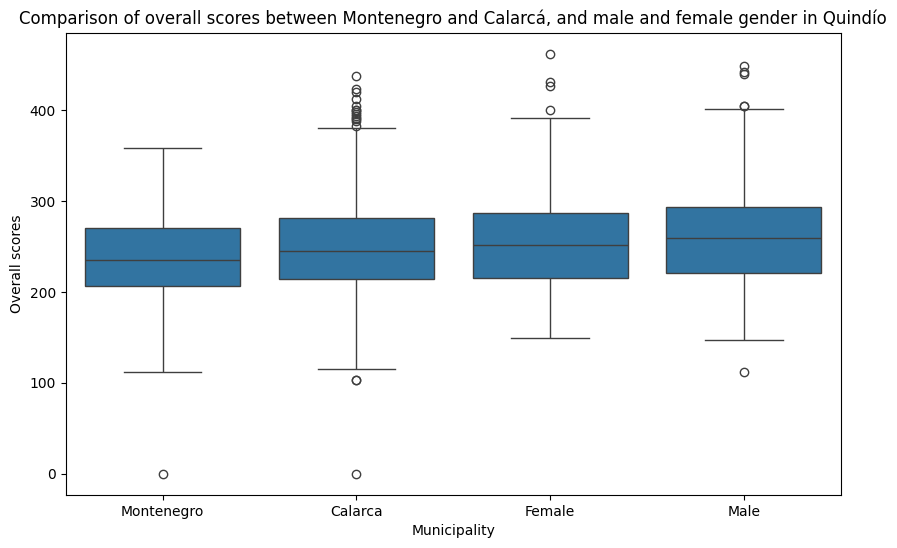

In [61]:
# Plot
data = pd.DataFrame({
    'PUNT_GLOBAL': pd.concat([
        Quindio_Montenegro_Subject_Results_df['PUNT_GLOBAL'],
        Quindio_Calarca_Subject_Results_df['PUNT_GLOBAL'],
        Gen_F_Quindio['PUNT_GLOBAL'],
        Gen_M_Quindio['PUNT_GLOBAL']
    ]),
    'municipality': ['Montenegro'] * len(Quindio_Montenegro_Subject_Results_df) +
                 ['Calarca'] * len(Gen_F_Quindio) +
                 ['Female'] * len(Quindio_Calarca_Subject_Results_df) +
                 ['Male'] * len(Gen_M_Quindio)
})

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='municipality', y='PUNT_GLOBAL', data=data)
plt.title('Comparison of overall scores between Montenegro and Calarcá, and male and female gender in Quindío')
plt.xlabel('Municipality')
plt.ylabel('Overall scores')
plt.show()

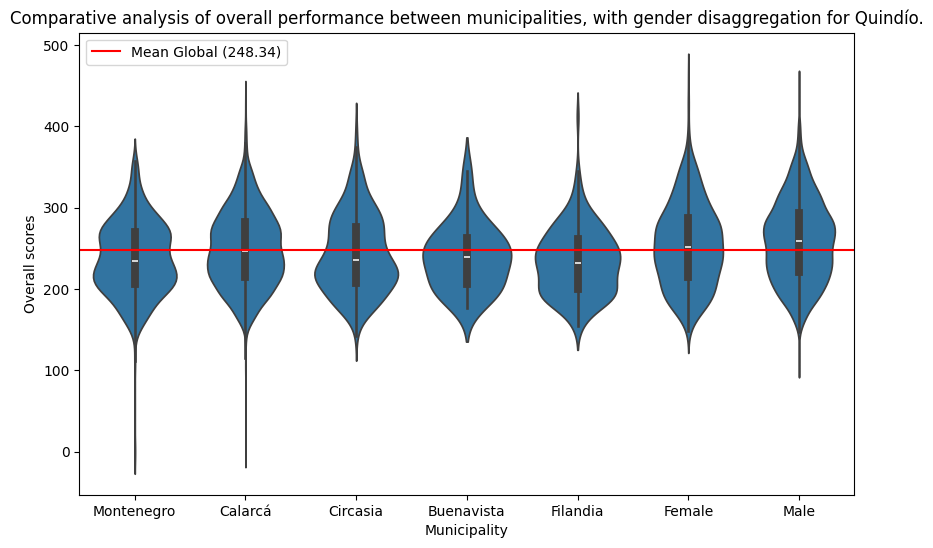

In [97]:
data = pd.DataFrame({
    'PUNT_GLOBAL': pd.concat([
        Quindio_Montenegro_Subject_Results_df['PUNT_GLOBAL'],
        Quindio_Calarca_Subject_Results_df['PUNT_GLOBAL'],
        Quindio_Cicasia_Subject_Results_df['PUNT_GLOBAL'],
        Quindio_Buenavista_Subject_Results_df['PUNT_GLOBAL'],
        Quindio_Filandia_Subject_Results_df['PUNT_GLOBAL'],
        Gen_F_Quindio['PUNT_GLOBAL'],
        Gen_M_Quindio['PUNT_GLOBAL']
    ]),
    'municipality': ['Montenegro'] * len(Quindio_Montenegro_Subject_Results_df) +
                 ['Calarcá'] * len(Gen_F_Quindio) +
                 ['Circasia'] * len(Quindio_Cicasia_Subject_Results_df) +
                 ['Buenavista'] * len(Quindio_Buenavista_Subject_Results_df) +
                 ['Filandia'] * len(Quindio_Filandia_Subject_Results_df) +
                 ['Female'] * len(Quindio_Calarca_Subject_Results_df) +
                 ['Male'] * len(Gen_M_Quindio)
                 
})

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='municipality', y='PUNT_GLOBAL', data=data)
plt.title('Comparative analysis of overall performance between municipalities, with gender disaggregation for Quindío.')
plt.xlabel('Municipality')
plt.ylabel('Overall scores')
plt.axhline(y=248.347102,color='r' , label= 'Mean Global (248.34)')
plt.legend()
plt.show()

## 📊 Fit some common distributions 📈

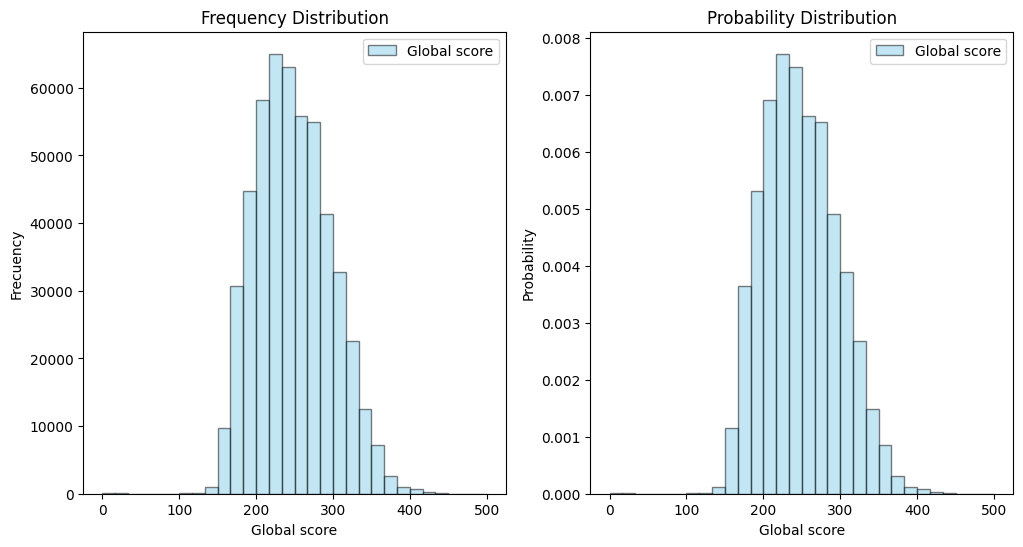

In [63]:
plt.figure(figsize=(12, 6))

ax_Freq_Dist = plt.subplot(121)
plt.hist(Saber11_df['PUNT_GLOBAL'], bins=30, alpha=0.5, label="Global score", color="skyblue", edgecolor="black")
plt.xlabel('Global score')
plt.ylabel('Frecuency')
plt.legend()
plt.title("Frequency Distribution")


ax_Prob_Dist = plt.subplot(122)
plt.hist(Saber11_df['PUNT_GLOBAL'], bins=30, density=True, alpha=0.5, label="Global score", color="skyblue", edgecolor="black")
plt.xlabel('Global score')
plt.ylabel('Probability')
plt.legend()
plt.title("Probability Distribution")

plt.show()

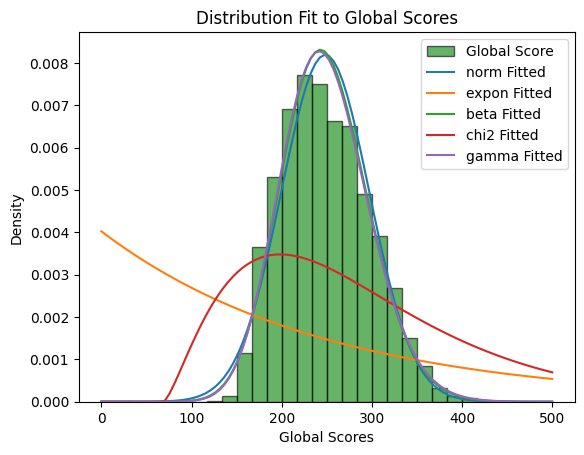

{'norm': {'param': (248.34710183967422, 48.69247518854215), 'D': 0.0402092669959197, 'p_value': 0.0}, 'expon': {'param': (0.0, 248.34710183967422), 'D': 0.46744679140109163, 'p_value': 0.0}, 'beta': {'param': (70.94110201140629, 1593.6697455290746, -166.79203185833427, 9739.83787006329), 'D': 0.031532427463727974, 'p_value': 0.0}, 'chi2': {'param': (4.855589107879577, 68.9998309671719, 45.29074073323551), 'D': 0.25819957805280025, 'p_value': 0.0}, 'gamma': {'param': (51.637835655646704, -100.78915236379589, 6.7612487500245635), 'D': 0.0284603836722499, 'p_value': 0.0}}


In [64]:
y_data = Saber11_df['PUNT_GLOBAL'] 

# Fit the distributions
distribuciones = [stats.norm, stats.expon, stats.beta, stats.chi2, stats.gamma]  # Some common distributions

# Fitting n test distributions to the data
def ajustar_y_comparar(y_data, distribuciones):
    plt.figure()
    plt.hist(y_data, bins=30, density=True, alpha=0.6, color='g', label='Global Score', edgecolor='black')

    mejores_dist = {}
    for dist in distribuciones:
        param = dist.fit(y_data)  # Fit distribution
        pdf_fitted = dist.pdf(np.linspace(min(y_data), max(y_data), 100), *param)  # Fitting PDF
        plt.plot(np.linspace(min(y_data), max(y_data), 100), pdf_fitted, label=f'{dist.name} Fitted')

        # Calcular la bondad de ajuste utilizando la prueba de Kolmogorov-Smirnov
        D, p_value = stats.kstest(y_data, dist.name, args=param)
        mejores_dist[dist.name] = {'param': param, 'D': D, 'p_value': p_value}
    
    plt.legend(loc='best')
    plt.title('Distribution Fit to Global Scores')
    plt.xlabel('Global Scores')
    plt.ylabel('Density')

    plt.show()

    return mejores_dist

# Ejecutar el ajuste y la comparación
mejores_dist = ajustar_y_comparar(y_data, distribuciones)
print(mejores_dist)

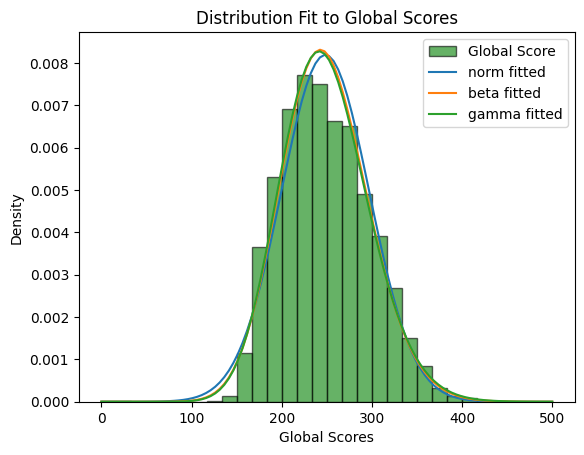

norm: AIC = 5356153.73, BIC = 5356175.99
beta: AIC = 5347957.48, BIC = 5348002.01
gamma: AIC = 5347395.00, BIC = 5347428.40


In [65]:
# Function to calculate AIC and BIC
def calculate_aic_bic(y_data, distributions):
    results = {}
    n = len(y_data)  # Number of data points
    for dist in distributions:
        param = dist.fit(y_data)  # Fit the distribution
        log_likelihood = np.sum(np.log(dist.pdf(y_data, *param)))  # Log-likelihood
        k = len(param)  # Number of fitted parameters
        aic = 2 * k - 2 * log_likelihood  # AIC formula
        bic = k * np.log(n) - 2 * log_likelihood  # BIC formula
        results[dist.name] = {'param': param, 'AIC': aic, 'BIC': bic}
    return results

# Function to fit distributions and calculate metrics
def fit_and_compare(y_data, distributions):
    plt.figure()
    plt.hist(y_data, bins=30, density=True, alpha=0.6, color='g', label='Global Score', edgecolor='black')

    best_distributions = {}
    for dist in distributions:
        param = dist.fit(y_data)  # Fit the distribution
        pdf_fitted = dist.pdf(np.linspace(min(y_data), max(y_data), 100), *param)  # Fitted PDF
        plt.plot(np.linspace(min(y_data), max(y_data), 100), pdf_fitted, label=f'{dist.name} fitted')

        # Calculate AIC and BIC
        log_likelihood = np.sum(np.log(dist.pdf(y_data, *param)))
        k = len(param)
        aic = 2 * k - 2 * log_likelihood
        bic = k * np.log(len(y_data)) - 2 * log_likelihood

        best_distributions[dist.name] = {'param': param, 'log_likelihood': log_likelihood, 'AIC': aic, 'BIC': bic}
    
    plt.legend(loc='best')
    plt.title('Distribution Fit to Global Scores')
    plt.xlabel('Global Scores')
    plt.ylabel('Density')
    plt.show()

    return best_distributions

# Set of distributions to test
distributions = [stats.norm, stats.beta, stats.gamma]

# Run the fitting and comparison
results = fit_and_compare(y_data, distributions)

# Display the results for AIC and BIC
for dist, values in results.items():
    print(f"{dist}: AIC = {values['AIC']:.2f}, BIC = {values['BIC']:.2f}")

In [66]:
params = stats.gamma.fit(y_data)
ks_stat, p_value = kstest(y_data, 'gamma', args=params)

print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

KS Statistic: 0.0284603836722499, p-value: 0.0


Due to the size of the dataset, the p-value is not of much help in these cases, however, we establish another metric which is: The AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) metrics. To interpret this data, the lowest AIC and BIC values ​​correspond to the best fit for the distribution of the dataset, among other things, it can be observed that the beta and gamma models are the best, however, gamma is better.

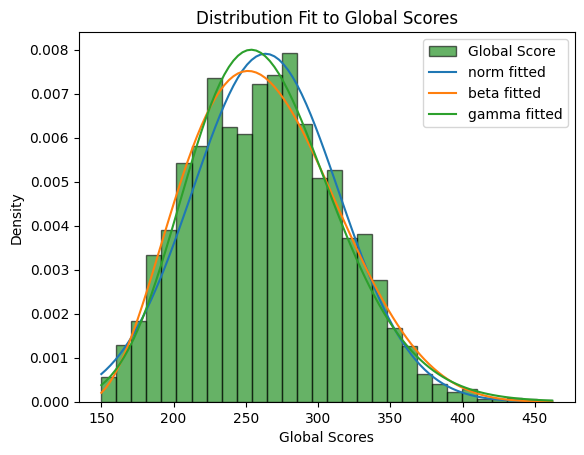

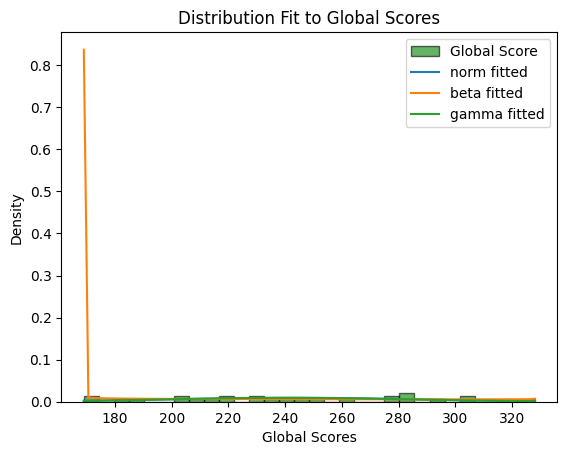

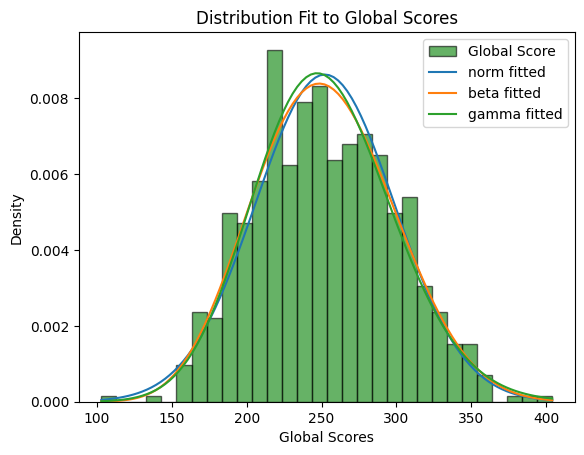

In [67]:
y_data_Quindio = [Quindio_Armenia_Subject_Results_df['PUNT_GLOBAL'], Quindio_Buenavista_Subject_Results_df['PUNT_GLOBAL'], Quindio_Calarca_Subject_Results_df['PUNT_GLOBAL']]

for _ in y_data_Quindio:
    results = fit_and_compare(_, distributions)

In [68]:
# Función para calcular el estadístico AD
def anderson_darling_test(y_data, dist, param):
    n = len(y_data)
    # Ordenar los datos
    y_sorted = np.sort(y_data)
    # Calcular la CDF teórica con los parámetros ajustados
    cdf = dist.cdf(y_sorted, *param)
    # Evitar log(0)
    cdf = np.clip(cdf, 1e-10, 1 - 1e-10)

    # Calcular el estadístico AD
    i = np.arange(1, n + 1)
    ad_stat = -n - np.sum((2 * i - 1) / n * (np.log(cdf) + np.log(1 - cdf[::-1])))

    return ad_stat

# Ajustar los datos a una distribución gamma
param_gamma = gamma.fit(y_data)

# Calcular el estadístico AD para la gamma ajustada
ad_statistic = anderson_darling_test(y_data, gamma, param_gamma)
print(f"Estadístico AD para la distribución Gamma: {ad_statistic:.4f}")

Estadístico AD para la distribución Gamma: 661.1852


In [71]:
# Generar muestras simuladas de una distribución gamma ajustada
def simular_ad_criticos(dist, param, n, num_simulaciones=10):
    ad_values = []
    for _ in range(num_simulaciones):
        simulacion = dist.rvs(*param, size=n)
        ad_stat = anderson_darling_test(simulacion, dist, param)
        ad_values.append(ad_stat)
    return np.percentile(ad_values, [90, 95, 99])  # Valores críticos al 10%, 5% y 1%

# Simular valores críticos para el test AD
n_datos = len(y_data)
valores_criticos = simular_ad_criticos(gamma, param_gamma, n_datos)
print(f"Valores críticos simulados (90%, 95%, 99%): {valores_criticos}")

Valores críticos simulados (90%, 95%, 99%): [1.44828915 1.89793251 2.25764719]
